In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Dataset/titanic_train.csv')

# Methods to identity Missing Data
    - .isnull()
    - .notnull()
    - .info()
    - .isna()

In [4]:
# .isnull()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.isnull().sum().sum()

866

In [6]:
df['Age'].isnull().sum()

177

In [7]:
# .notnull()
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
df.notnull().sum().sum()

9826

In [9]:
df['Age'].notnull().sum()

714

In [10]:
# .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# .isna()

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.isna().sum().sum()

866

# Handle Missing Values <span style="color:red">(First thing to do)</span>

1. Mean, median and Mode imputation 
2. Random sample Imputation
3. Capturing NAN values with a New Feature
4. End of Distribution imputation
5. Arbitarary Imputation
6. Frequent Categories Imputation


# 1. Mean, median and Mode imputation 
 

In [14]:
df = pd.read_csv('Dataset/titanic_train.csv',usecols=['Age','Fare','Survived'])

In [15]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [16]:
# creating new feature with imputed mean/median/mode
def impute_nan(df, variable, method):
    df[variable+'_median'] = df[variable].fillna(method)

In [17]:
method = df.Age.median() # it can be mean/median/ mode
# not using mean coz there may be some outliers
method

28.0

In [18]:
impute_nan(df,'Age',method)

In [19]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


# 2. Random Sample Imputation

In [20]:
import pandas as pd
df = pd.read_csv('Dataset/titanic_train.csv', usecols=['Age','Fare','Survived'])
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [21]:
df['Age'].isnull().sum()

177

In [22]:
# getting random values as many as missing data is in 'Age' Feature
random_sample= df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=50)
random_sample

695    52.0
446    13.0
218    32.0
369    24.0
652    21.0
       ... 
787     8.0
366    60.0
255    29.0
708    22.0
188    40.0
Name: Age, Length: 177, dtype: float64

In [23]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [24]:
random_sample.index=df[df['Age'].isnull()].index
random_sample

5      52.0
17     13.0
19     32.0
26     24.0
28     21.0
       ... 
859     8.0
863    60.0
868    29.0
878    22.0
888    40.0
Name: Age, Length: 177, dtype: float64

In [25]:
def impute_nan_random(df, variable):
    df[variable+"_random"] = df[variable]
    # it will have random sample to fill the na
    random_sample = df[variable].dropna().sample(df['Age'].isnull().sum(),random_state = 0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [26]:
impute_nan_random(df,"Age")
df.head(2)

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0


In [27]:
df['Age'].fillna(mean)

NameError: name 'mean' is not defined

In [ ]:
# comparing it with median and mean
df['Age_median']=df['Age'].fillna(df.Age.median())
df['Age_mean']=df['Age'].fillna(df.Age.mean())
df.head(2)

In [ ]:
df.info()

AttributeError: 'DataFrame' object has no attribute 'Age_mean'

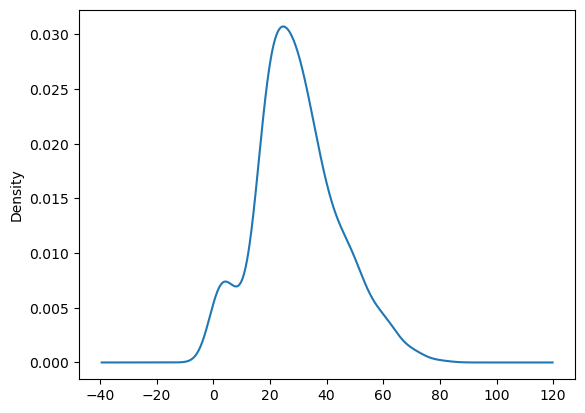

In [28]:
fig = plt.figure()
ax =  fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_mean.plot(kind='kde', ax=ax, color = 'black')
df.Age_median.plot(kind='kde', ax=ax, color = 'red')
df.Age_random.plot(kind='kde', ax=ax, color = 'green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
fig = plt.figure()
ax =  fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_mean.plot(kind='kde', ax=ax, color = 'black')
df.Age_median.plot(kind='kde', ax=ax, color = 'red')
df.Age_random.plot(kind='kde', ax=ax, color = 'green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# 3. Capturing NAN values with a new feature
- It work well  where data is not missing completely  at random

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('dataset/titanic_train.csv', usecols=['Age','Fare','Survived'])
# survived is dependent feature
df.head(2)

In [ ]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)
df.head(2)

In [ ]:
df[df.Age.isnull()]

# 4. End of Distribution 

In [ ]:
import pandas as pd
df = pd.read_csv('Dataset/titanic_train.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

In [ ]:
df.Age.hist(bins = 50)

In [29]:
# picking data 3  std away
extreme = df.Age.mean() + 3*df.Age.std()
extreme

73.27860964406095

C:\Users\sanjay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

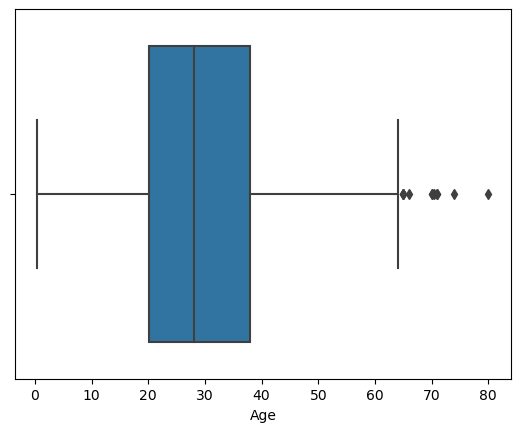

In [30]:
import seaborn as sns
sns.boxplot('Age', data = df)

In [31]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [32]:
impute_nan(df, 'Age', df.Age.median(), extreme)

In [33]:
df.head()

,Survived,Age,Fare,Age_random,Age_end_distribution
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


<AxesSubplot:>

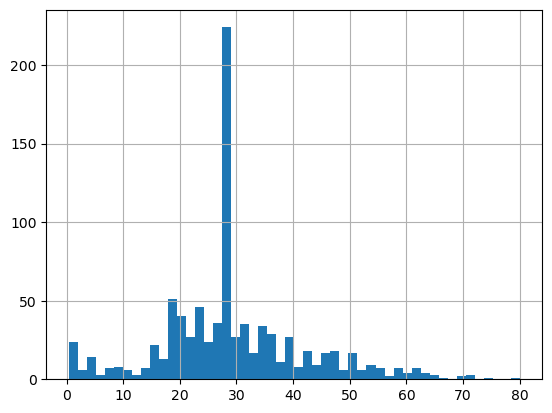

In [34]:
df['Age'].hist(bins = 50)

<AxesSubplot:>

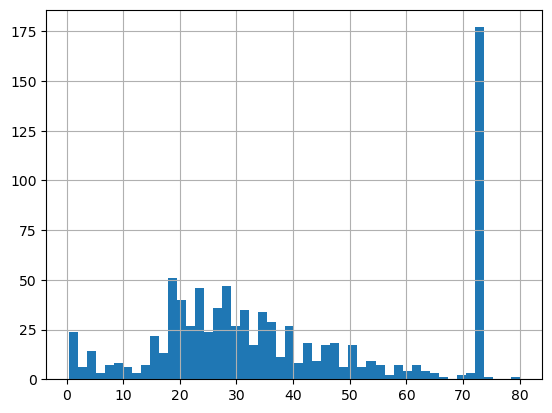

In [35]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\sanjay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

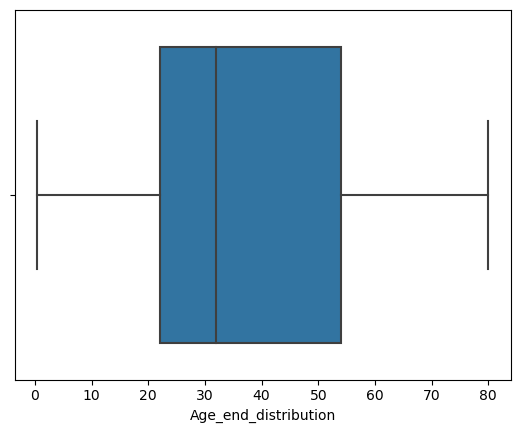

In [36]:
sns.boxplot('Age_end_distribution', data=df)

In [37]:
# 5. Arbitary Imputation

In [38]:
df = pd.read_csv('Dataset/titanic_train.csv', usecols=['Age','Fare','Survived'])
# survived is dependent feature
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [39]:
def impute_nan(df,variable):
    df[variable+'_zero']= df[variable].fillna(0)
    df[variable+'_hundered']= df[variable].fillna(100)
    

<AxesSubplot:>

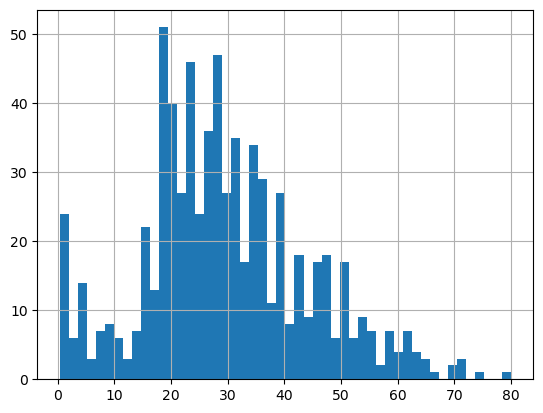

In [40]:
df['Age'].hist(bins=50)

# <span style="color:red">Handling Categorical Features</span>

# 6. Frequent Categorical Imputation

In [41]:
import pandas as pd
df=pd.read_csv('Dataset/house_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [42]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [43]:
# percentage of missing values
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:xlabel='BsmtQual'>

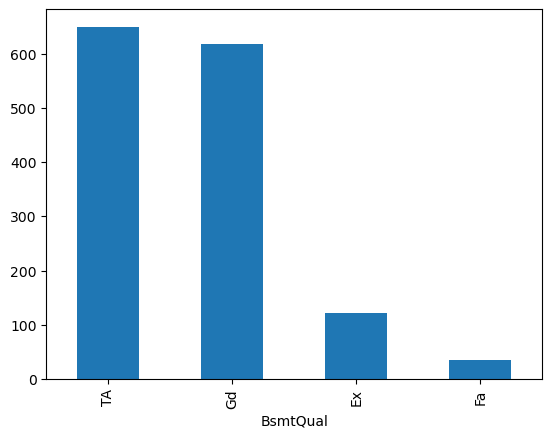

In [44]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

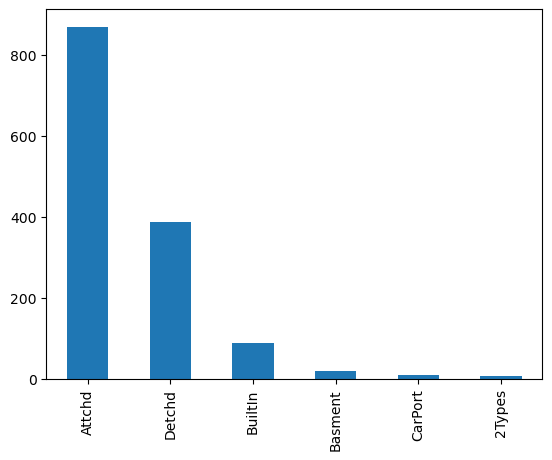

In [45]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

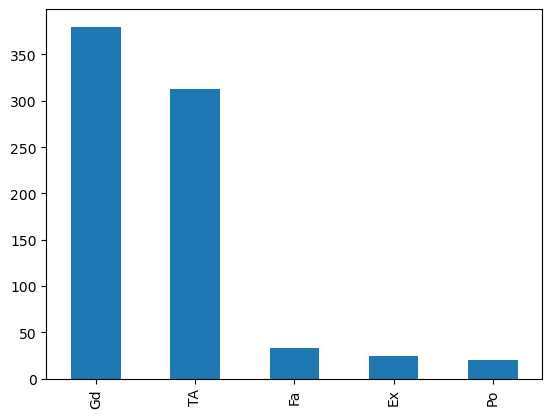

In [46]:
df['FireplaceQu'].value_counts().plot.bar()

In [47]:
df["GarageType"].value_counts().index[0]

'Attchd'

In [48]:
#### replacing function
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace=True)

In [49]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [50]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [51]:
df['GarageType'].mode()[0]

'Attchd'

# Capturing NaN with new feature

In [52]:
import pandas as pd
import numpy as np
df=pd.read_csv('Dataset/house_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [53]:
df['BsmtQual_var']= np.where(df['BsmtQual'].isnull(),1,0)
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0
1456,Gd,TA,Attchd,210000,0
1457,TA,Gd,Attchd,266500,0
1458,TA,NaN,Attchd,142125,0


In [54]:
df[df['BsmtQual'].isnull()].head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
17,NaN,NaN,CarPort,90000,1
39,NaN,NaN,NaN,82000,1
90,NaN,NaN,Detchd,109900,1
102,NaN,NaN,Attchd,118964,1
156,NaN,NaN,Detchd,109500,1


In [55]:
frequent=df['BsmtQual'].mode()[0]

In [56]:
df['BsmtQual'].fillna(frequent,inplace=True)
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0
1456,Gd,TA,Attchd,210000,0
1457,TA,Gd,Attchd,266500,0
1458,TA,NaN,Attchd,142125,0


In [57]:
df['FireplaceQu_var']= np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0
1456,Gd,TA,Attchd,210000,0,0
1457,TA,Gd,Attchd,266500,0,0
1458,TA,Gd,Attchd,142125,0,1


# suppose if you have more frequent categories , we just replace nan with a new category

In [58]:
df=pd.read_csv('Dataset/house_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [59]:
def impute_nan(df,variable):
    df[variable+'newvar']=np.where(df[variable].isnull(),"missing",df[variable])

In [60]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
    

In [61]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd,TA,Attchd
1456,Gd,TA,Attchd,210000,Gd,TA,Attchd
1457,TA,Gd,Attchd,266500,TA,Gd,Attchd
1458,TA,NaN,Attchd,142125,TA,missing,Attchd


# - Forward  and backward Filling 
same as First Observation Carried Forward and last Observation Carried Forward 

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Dataset/house_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [2]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

#### Forward Filling ( Last Observation Carried Forward)

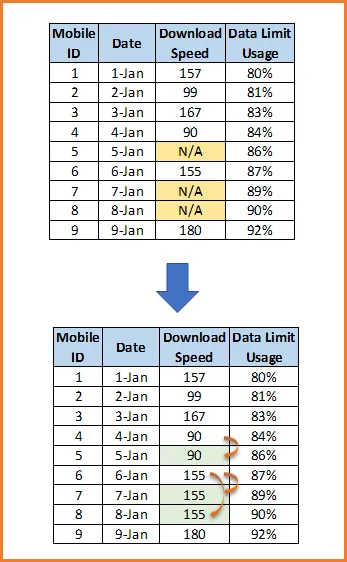

In [3]:
#argument to fill the missing values with the last available observation (most recently observed value)
df['BsmtQual'].fillna(method='ffill', inplace=True) # 'bfill' - for FOCF

In [4]:
df.isnull().sum()

BsmtQual         0
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

#### Backward Filling (Next Observation Carried Backward (NOCB))
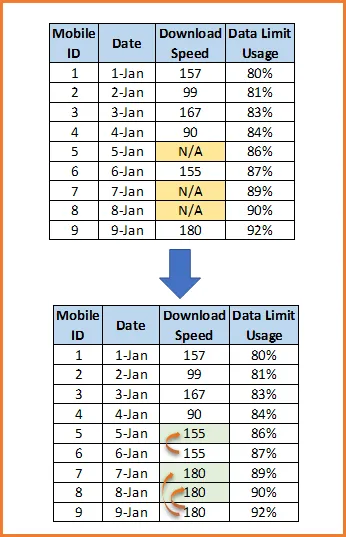

In [5]:
df.GarageType.fillna(method='bfill', inplace=True)

In [6]:
df.isnull().sum()

BsmtQual         0
FireplaceQu    690
GarageType       0
SalePrice        0
dtype: int64